In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('..')

from helper import linear_regression as lr
from helper import general

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X, y, Xval, yval, Xtest, ytest = lr.load_data()
# insert the intercept data of every X
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

In [22]:
training_cost, cv_cost = [], []

1. use the subset of training set to fit the model
2. no regularization when you compute the training cost and CV cost
3. remember to use the same subset of training set to compute training cost

In [23]:
m = X.shape[0]
for i in range(1, m+1):
    print('i={}'.format(i))
    res = lr.linear_regression_np(X[:i, :], y[:i], l=0)
    
    tc = lr.regularized_cost(res.x, X[:i, :], y[:i], l=0)
    cv = lr.regularized_cost(res.x, Xval, yval, l=0)
    print('tc={}, cv={}'.format(tc, cv))
    
    training_cost.append(tc)
    cv_cost.append(cv)

i=1
tc=8.631534185484672e-18, cv=169.87070840820138
i=2
tc=8.371044654825317e-18, cv=110.30036584504248
i=3
tc=3.2865950455012842, cv=45.01023144430755
i=4
tc=2.842677689399798, cv=48.368911435730986
i=5
tc=13.15404880911492, cv=35.86516466430989
i=6
tc=19.443962512495474, cv=33.82996176310068
i=7
tc=20.098521655088906, cv=31.97098586436936
i=8
tc=18.17285869520004, cv=30.862446389127246
i=9
tc=22.60940542495473, cv=31.135997944242025
i=10
tc=23.26146159261183, cv=28.93620752614617
i=11
tc=24.31724958804421, cv=29.551432060744098
i=12
tc=22.373906495108923, cv=29.433817979845635


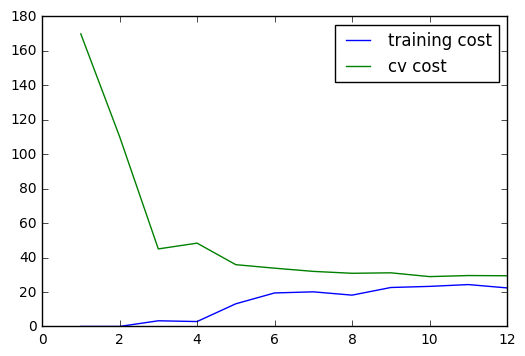

In [28]:
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), cv_cost, label='cv cost')
plt.legend(loc=1)

the model can't even fit traning set well, **under fitting**